In [1]:
import matplotlib.pyplot as plt
import json
import networkx as nx

# Como o problema foi modelado?

Utilizou-se um dígrafo

In [2]:
#exemplo de uma rede simples com apenas uma profundidade
FILE_PATH = 'dataset/json/depth1_pytorch.json'

with open(FILE_PATH) as f:
    json_data = json.load(f)

In [3]:
G = nx.DiGraph()
G.add_nodes_from(
    node['id']
    for node in json_data['nodes'][:5]
)

G.add_edges_from(
    (link['source'], link['target'])
    for link in json_data['links'][:4]
)

print('Number of nodes: {}'.format(G.number_of_nodes()))
print('Number of edges: {}'.format(G.number_of_edges()))

Number of nodes: 5
Number of edges: 4


In [4]:
G.edges

OutEdgeView([('PyCQA/flake8', 'pytorch/pytorch'), ('PyCQA/flake8-bugbear', 'pytorch/pytorch'), ('adamchainz/flake8-comprehensions', 'pytorch/pytorch'), ('xuhdev/flake8-executable', 'pytorch/pytorch')])

Cada aresta parte de uma dependência para um dependente. Desta forma, a aresta pode ser interpretada como uma relação definida pela frase:

**"É dependência de"**

In [5]:
edge_labels = dict([((source, target),  'é dependência de')
                    for source, target in G.edges])

In [6]:
edge_labels

{('PyCQA/flake8', 'pytorch/pytorch'): 'é dependência de',
 ('PyCQA/flake8-bugbear', 'pytorch/pytorch'): 'é dependência de',
 ('adamchainz/flake8-comprehensions', 'pytorch/pytorch'): 'é dependência de',
 ('xuhdev/flake8-executable', 'pytorch/pytorch'): 'é dependência de'}

Exemplo ilustrativo com apenas 5 nós e 4 arestas

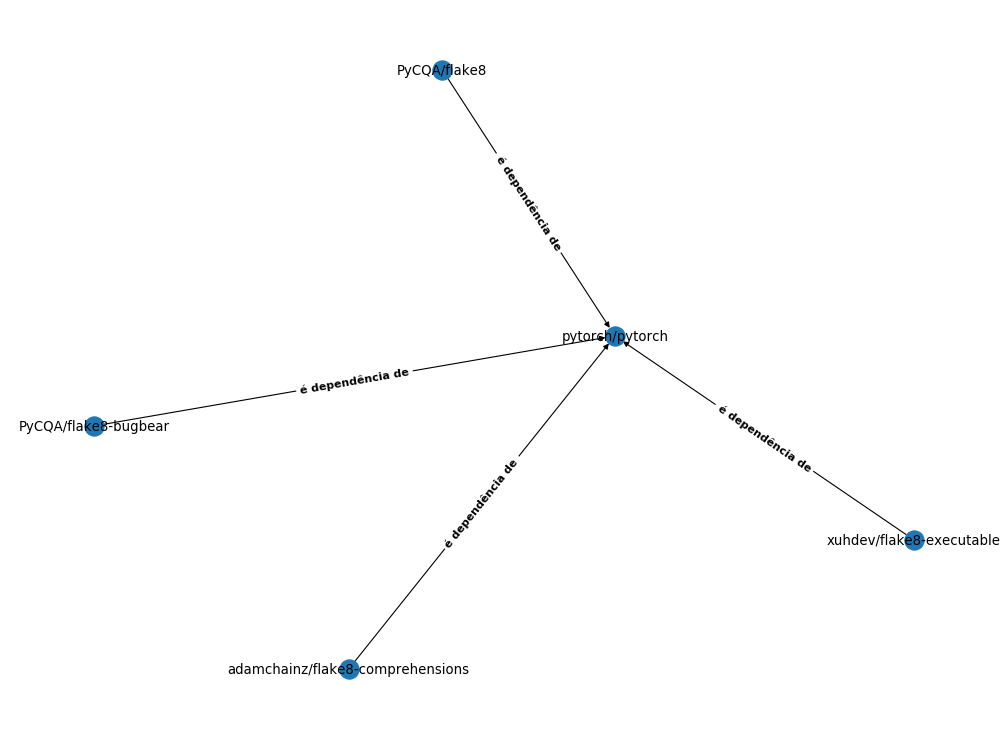

In [7]:
pos = nx.spring_layout(G)
plt.figure(figsize=(2*8, 2*6), dpi=80) 
nx.draw_networkx(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5,
                             font_color='black', font_size=10, font_weight='bold')
plt.axis('off')
plt.show()

# Rede utilizada no tópico **Visualização: D3.js**

In [8]:
#exemplo de uma rede simples com apenas depth = 2
FILE_PATH = 'dataset/json/depth2.json'

with open(FILE_PATH) as f:
    json_data = json.load(f)

In [9]:
G2 = nx.DiGraph()
G2.add_nodes_from(
    node['id']
    for node in json_data['nodes']
)

G2.add_edges_from(
    (link['source'], link['target'])
    for link in json_data['links']
)

print('Number of nodes: {}'.format(G2.number_of_nodes()))
print('Number of edges: {}'.format(G2.number_of_edges()))

Number of nodes: 726
Number of edges: 1371


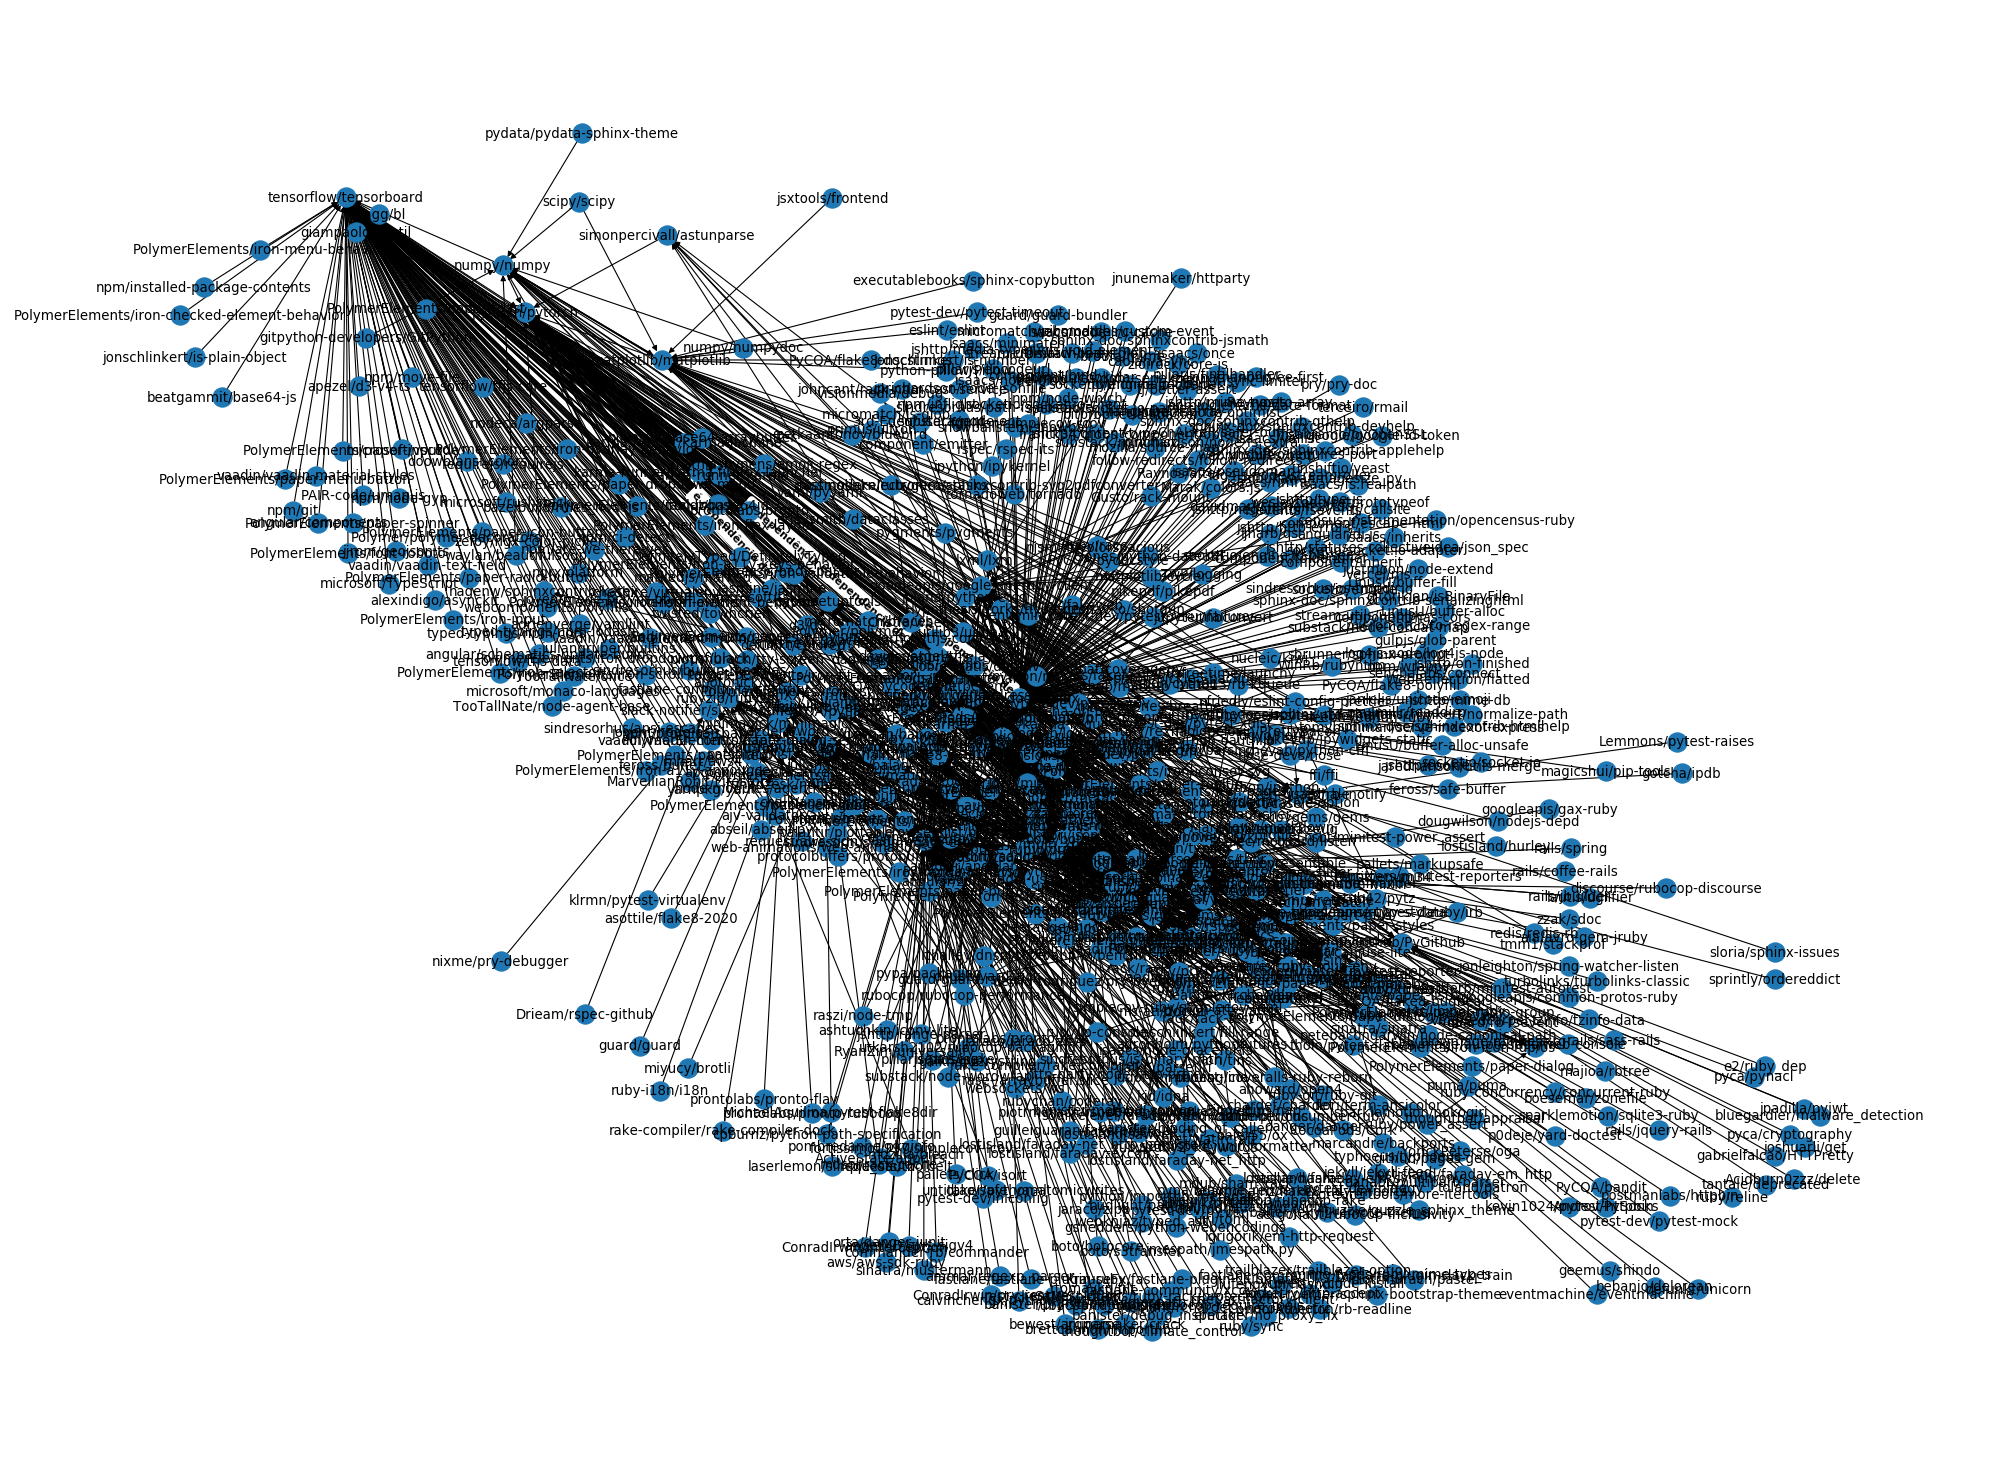

In [10]:
pos = nx.spring_layout(G2)
plt.figure(figsize=(4*8, 4*6), dpi=80) 
nx.draw_networkx(G2, pos)
nx.draw_networkx_edge_labels(G2, pos, edge_labels=edge_labels, label_pos=0.5,
                             font_color='black', font_size=10, font_weight='bold')
plt.axis('off')
plt.show()

## Dúvida 1: Existem repositórios que dependem deles mesmos(loops)?

## Dúvida 2: Existem repositórios que são dependências e dependentes entre si. Ou seja, existe uma aresta $(source, target)$ e uma outra $(target, source)$?

In [11]:
for source, target in G2.edges():
    if ((target, source) in G2.edges()):
        print(source, target)

sphinx-doc/sphinx pypa/setuptools
python/typing python/typing
numpy/numpy matplotlib/matplotlib
matplotlib/matplotlib numpy/numpy
pypa/setuptools sphinx-doc/sphinx
tensorflow/tensorboard tensorflow/tensorboard
googleapis/google-cloud-ruby googleapis/google-cloud-ruby


Vale visitar o grafo de dependências no site do github para verificar

## Grafo pytorch com profundidade 3

In [12]:
FILE_PATH = 'dataset/json/graph.json'

with open(FILE_PATH) as f:
    json_data = json.load(f)
    
G3 = nx.DiGraph()
G3.add_nodes_from(
    node['id']
    for node in json_data['nodes']
)

G3.add_edges_from(
    (link['source'], link['target'])
    for link in json_data['links']
)

print('Number of nodes: {}'.format(G3.number_of_nodes()))
print('Number of edges: {}'.format(G3.number_of_edges()))

Number of nodes: 4004
Number of edges: 37944
